### Importing Libraries

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Calling Dataset

In [2]:
#reading dataset
ds_news=pd.read_csv("news.csv",encoding="latin-1")

ds_news

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â In Sonny Perdueâs telling,...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentinaâs Lione...,David Waldstein,HOUSTON â Venezuela had a plan. It was a ...,0
2,2,19113,Cotton to House: âDo Not Walk the Plank and ...,Pam Key,"Sunday on ABCâs âThis Week,â while discu...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â The beleaguered Republican...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20716,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20717,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20718,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20719,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"Itâs officially summer, and the Society Bout...",0


### Describing Information

In [3]:
#describing information
ds_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20721 entries, 0 to 20720
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20721 non-null  object
 1   id          20721 non-null  object
 2   headline    20163 non-null  object
 3   written_by  18769 non-null  object
 4   news        20682 non-null  object
 5   label       20721 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 971.4+ KB


### Replacing Missing Values

In [4]:
#replacing null values numeric values
for col in ["headline","written_by","news"]:
    ds_news[col].fillna(ds_news[col].mode()[0],inplace=True)

In [5]:
#rechecking missing values
ds_news.isnull().sum()

Unnamed: 0    0
id            0
headline      0
written_by    0
news          0
label         0
dtype: int64

### Dropping Columns

In [6]:
#dropping lesser important columns from the dataset
ds_news.drop(["Unnamed: 0"],axis=1,inplace=True)

In [7]:
ds_news.drop(["id"],axis=1,inplace=True)

In [8]:
#rechecking dataset
ds_news

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â In Sonny Perdueâs telling,...",0
1,U.S. Must Dig Deep to Stop Argentinaâs Lione...,David Waldstein,HOUSTON â Venezuela had a plan. It was a ...,0
2,Cotton to House: âDo Not Walk the Plank and ...,Pam Key,"Sunday on ABCâs âThis Week,â while discu...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â The beleaguered Republican...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...
20716,Get Ready For Civil Unrest: Survey Finds That ...,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20717,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20718,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20719,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"Itâs officially summer, and the Society Bout...",0


### Checking Value Counts

In [9]:
#checking value counts
ds_news.label.value_counts()

1    10371
0    10350
Name: label, dtype: int64

### Checking Ratios

In [10]:
#checking ratios
print("fake ratio =",round(len(ds_news[ds_news["label"]==1])/len(ds_news.label),2)*100,"%")

print("real ratio =",round(len(ds_news[ds_news["label"]==0])/len(ds_news.label),2)*100,"%")

fake ratio = 50.0 %
real ratio = 50.0 %


### Creating Columns

In [11]:
#creating new columns for understanding the letter counts
ds_news["headline_length"]=ds_news.headline.str.len()

ds_news["news_length"]=ds_news.news.str.len()

ds_news

,headline,written_by,news,label,headline_length,news_length
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â In Sonny Perdueâs telling,...",0,84,8064
1,U.S. Must Dig Deep to Stop Argentinaâs Lione...,David Waldstein,HOUSTON â Venezuela had a plan. It was a ...,0,74,6253
2,Cotton to House: âDo Not Walk the Plank and ...,Pam Key,"Sunday on ABCâs âThis Week,â while discu...",0,104,441
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â The beleaguered Republican...",0,100,6662
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,28,9290
...,...,...,...,...,...,...
20716,Get Ready For Civil Unrest: Survey Finds That ...,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1,98,69
20717,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1,43,6737
20718,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1,84,3473
20719,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"Itâs officially summer, and the Society Bout...",0,55,2342


### Converting to Lower Case 

In [12]:
#converting to lower case
ds_news["headline"]=ds_news["headline"].str.lower()

ds_news["news"]=ds_news["news"].str.lower()   

ds_news

,headline,written_by,news,label,headline_length,news_length
0,ethics questions dogged agriculture nominee as...,Eric Lipton and Steve Eder,"washington â in sonny perdueâs telling,...",0,84,8064
1,u.s. must dig deep to stop argentinaâs lione...,David Waldstein,houston â venezuela had a plan. it was a ...,0,74,6253
2,cotton to house: âdo not walk the plank and ...,Pam Key,"sunday on abcâs âthis week,â while discu...",0,104,441
3,"paul lepage, besieged maine governor, sends co...",Jess Bidgood,"augusta, me. â the beleaguered republican...",0,100,6662
4,a digital 9/11 if trump wins,Finian Cunningham,finian cunningham has written extensively on...,1,28,9290
...,...,...,...,...,...,...
20716,get ready for civil unrest: survey finds that ...,NeverSurrender,"no, you'll be a dog licking of the vomit of yo...",1,98,69
20717,albert pike and the european migrant crisis,Rixon Stewart,"by rixon stewart on november 5, 2016 rixon ste...",1,43,6737
20718,dakota access caught infiltrating protests to ...,Eddy Lavine,posted by eddie you know the dakota access pip...,1,84,3473
20719,how to stretch the summer solstice - the new y...,Alison S. Cohn,"itâs officially summer, and the society bout...",0,55,2342


### Feature Engineering

In [13]:
#removing leading and trailing white space
ds_news["headline"]=ds_news["headline"].str.replace(r"^\s+?$"," ")

In [14]:
#removing leading and trailing white space
ds_news["news"]=ds_news["news"].str.replace(r"^\s+?$"," ")

In [15]:
#replacing blank space with single space
ds_news["headline"]=ds_news["headline"].str.replace(r"\s+"," ")

In [16]:
#replacing blank space with single space
ds_news["news"]=ds_news["news"].str.replace(r"\s+"," ")

In [17]:
#replacing punctuation
ds_news["headline"]=ds_news["headline"].str.replace(r"[^\w\d\s]"," ")

In [18]:
#replacing punctuation
ds_news["news"]=ds_news["news"].str.replace(r"[^\w\d\s]"," ")

### Removing Stopwords

In [19]:
#removing stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english"))

ds_news["headline"]=ds_news["headline"].apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))  

ds_news["news"]=ds_news["news"].apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))   

### Making New Columns

In [20]:
#new column clean_length
ds_news["headline_length_new"]=ds_news.headline.str.len()

ds_news["news_length_new"]=ds_news.news.str.len()

ds_news

,headline,written_by,news,label,headline_length,news_length,headline_length_new,news_length_new
0,ethics questions dogged agriculture nominee ge...,Eric Lipton and Steve Eder,washington â sonny perdueâ telling georgians g...,0,84,8064,75,5559
1,u must dig deep stop argentinaâ lionel messi n...,David Waldstein,houston â venezuela plan tactical approach des...,0,74,6253,59,4244
2,cotton house â walk plank vote bill cannot pas...,Pam Key,sunday abcâ â week â discussing republican pla...,0,104,441,65,286
3,paul lepage besieged maine governor sends conf...,Jess Bidgood,augusta â beleaguered republican governor main...,0,100,6662,87,4570
4,digital 9 11 trump wins,Finian Cunningham,finian cunningham written extensively internat...,1,28,9290,23,6785
...,...,...,...,...,...,...,...,...
20716,get ready civil unrest survey finds americans ...,NeverSurrender,dog licking vomit chinese overlords,1,98,69,73,35
20717,albert pike european migrant crisis,Rixon Stewart,rixon stewart november 5 2016 rixon stewart â ...,1,43,6737,35,4541
20718,dakota access caught infiltrating protests inc...,Eddy Lavine,posted eddie know dakota access pipeline prote...,1,84,3473,80,2576
20719,stretch summer solstice new york times,Alison S. Cohn,itâ officially summer society boutique society...,0,55,2342,38,1741


### Displaying Length Removal

In [21]:
#total length removal
print("Headline Original Length",ds_news.headline_length.sum())

print("Headline Clean Length",ds_news.headline_length_new.sum())

print("News Original Length",ds_news.news_length.sum())

print("News Clean Length",ds_news.news_length_new.sum())

Headline Original Length 1590961
Headline Clean Length 1270249
News Original Length 91925652
News Clean Length 64000576


### Plotting Distribution of Original Length of Words

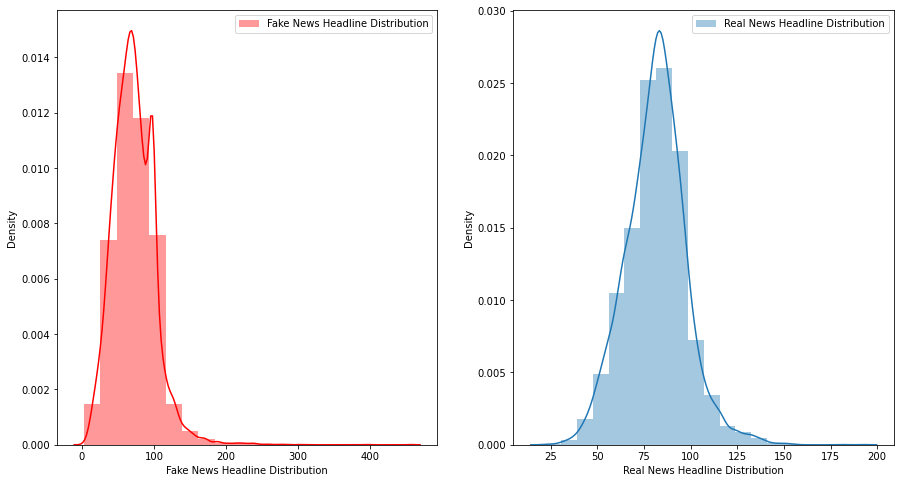

In [22]:
#plotting distribution of original headline length of words
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(ds_news[ds_news["label"]==1]["headline_length"],bins=20,ax=ax[0],label="Fake News Headline Distribution",color="r")

ax[0].set_xlabel("Fake News Headline Distribution")

ax[0].legend()

sns.distplot(ds_news[ds_news["label"]==0]["headline_length"],bins=20,ax=ax[1],label="Real News Headline Distribution")

ax[1].set_xlabel("Real News Headline Distribution")

ax[1].legend()

plt.show()

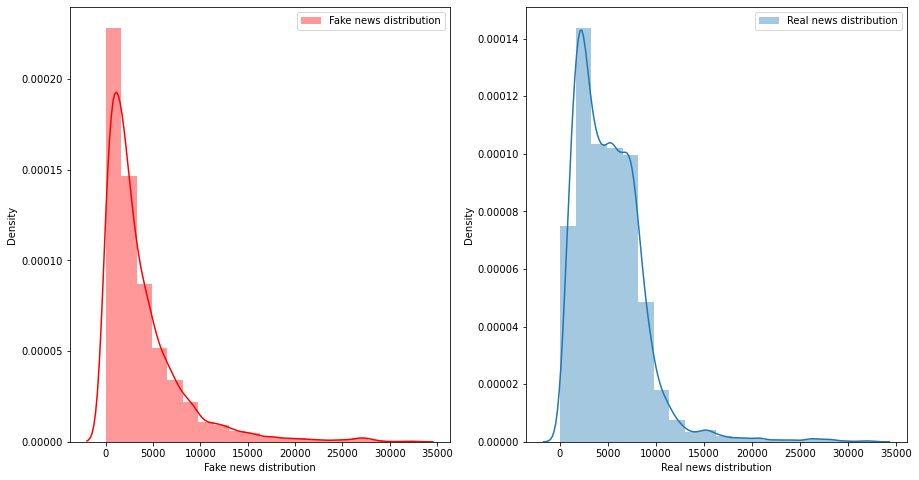

In [23]:
#plotting distribution of original news length of words
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(ds_news[ds_news["label"]==1]["news_length"],bins=20,ax=ax[0],label="Fake news distribution",color="r")

ax[0].set_xlabel("Fake news distribution")

ax[0].legend()

sns.distplot(ds_news[ds_news["label"]==0]["news_length"],bins=20,ax=ax[1],label="Real news distribution")

ax[1].set_xlabel("Real news distribution")

ax[1].legend()

plt.show()

### Plotting Distribution of Cleaned Length of Words

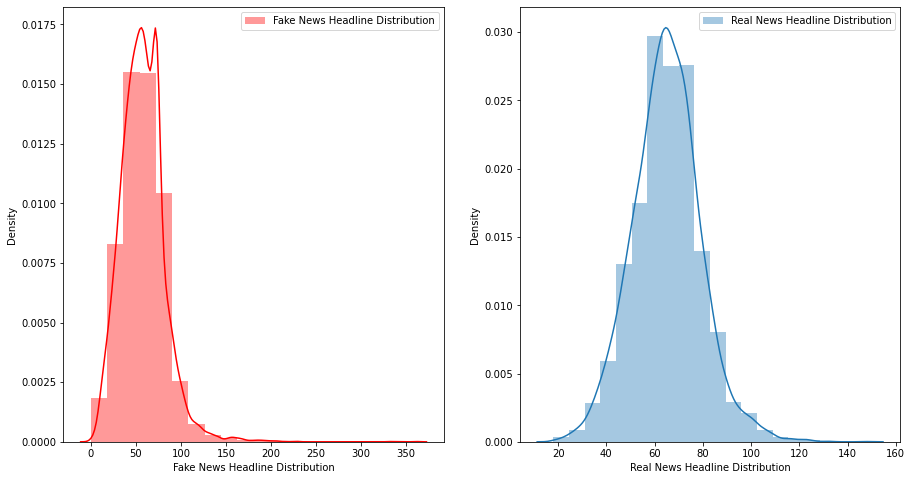

In [24]:
#plotting distribution of cleaned headline length of words
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(ds_news[ds_news["label"]==1]["headline_length_new"],bins=20,ax=ax[0],label="Fake News Headline Distribution",color="r")

ax[0].set_xlabel("Fake News Headline Distribution")

ax[0].legend()

sns.distplot(ds_news[ds_news["label"]==0]["headline_length_new"],bins=20,ax=ax[1],label="Real News Headline Distribution")

ax[1].set_xlabel("Real News Headline Distribution")

ax[1].legend()

plt.show()

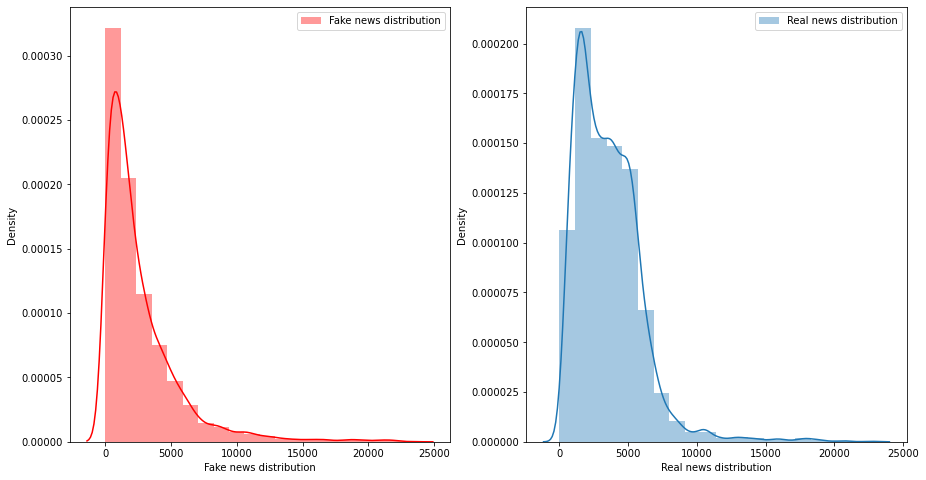

In [25]:
#plotting distribution of original news length of words
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(ds_news[ds_news["label"]==1]["news_length_new"],bins=20,ax=ax[0],label="Fake news distribution",color="r")

ax[0].set_xlabel("Fake news distribution")

ax[0].legend()

sns.distplot(ds_news[ds_news["label"]==0]["news_length_new"],bins=20,ax=ax[1],label="Real news distribution")

ax[1].set_xlabel("Real news distribution")

ax[1].legend()

plt.show()

### Creating Word Cloud

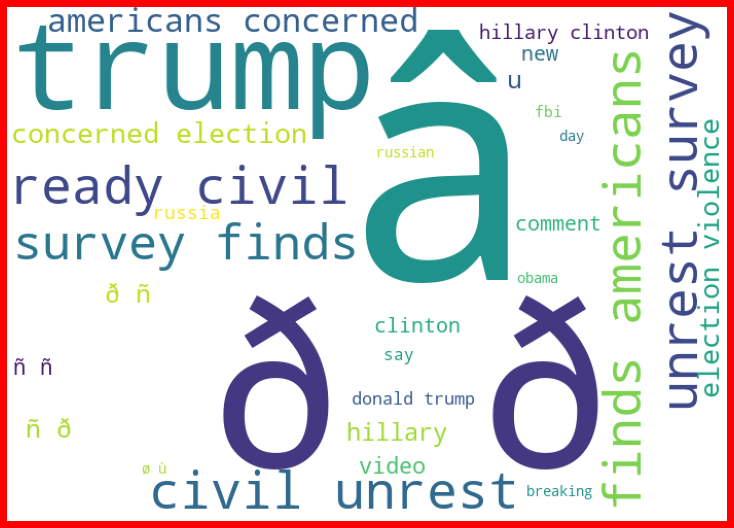

In [26]:
#creating word cloud for the fake news headline
from wordcloud import WordCloud

fake=ds_news["headline"][ds_news["label"]==1]

fake_cloud=WordCloud(width=700,height=500,background_color="white",max_words=30).generate(" ".join(fake))

plt.figure(figsize=(10,8),facecolor="r")

plt.imshow(fake_cloud)

plt.axis("off")

plt.tight_layout(pad=0)

plt.show()

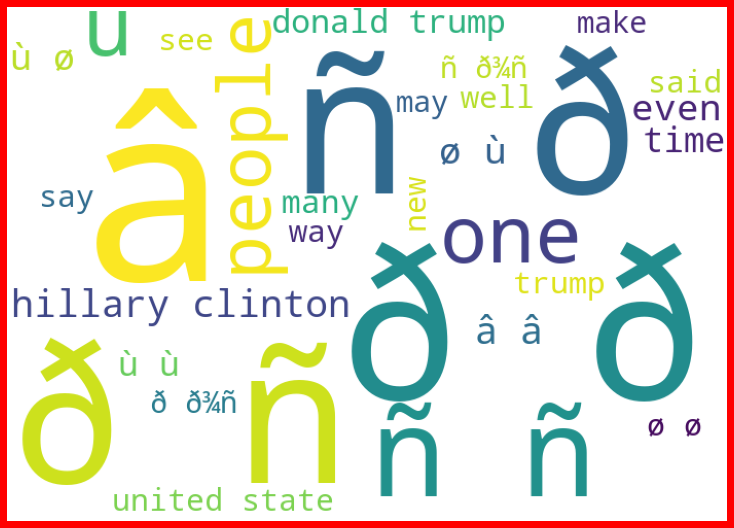

In [27]:
#creating word cloud for the fake news body
fake=ds_news["news"][ds_news["label"]==1]

fake_cloud=WordCloud(width=700,height=500,background_color="white",max_words=30).generate(" ".join(fake))

plt.figure(figsize=(10,8),facecolor="r")

plt.imshow(fake_cloud)

plt.axis("off")

plt.tight_layout(pad=0)

plt.show()

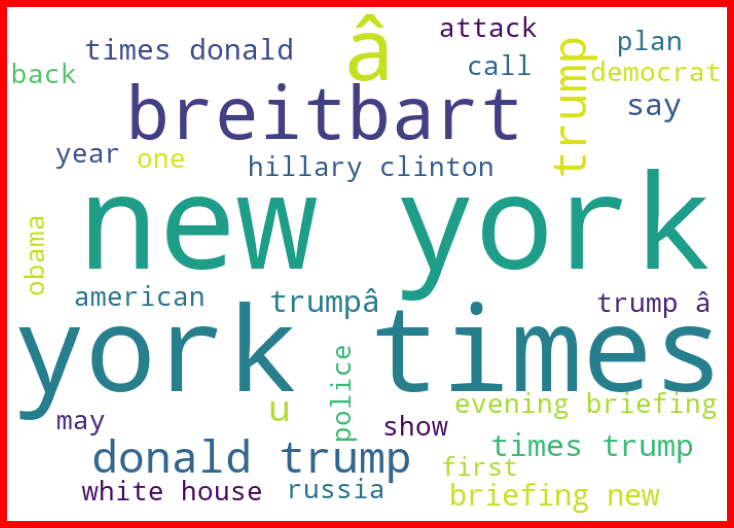

In [28]:
#creating word cloud for the real news headline
from wordcloud import WordCloud

real=ds_news["headline"][ds_news["label"]==0]

real_cloud=WordCloud(width=700,height=500,background_color="white",max_words=30).generate(" ".join(real))

plt.figure(figsize=(10,8),facecolor="r")

plt.imshow(real_cloud)

plt.axis("off")

plt.tight_layout(pad=0)

plt.show()

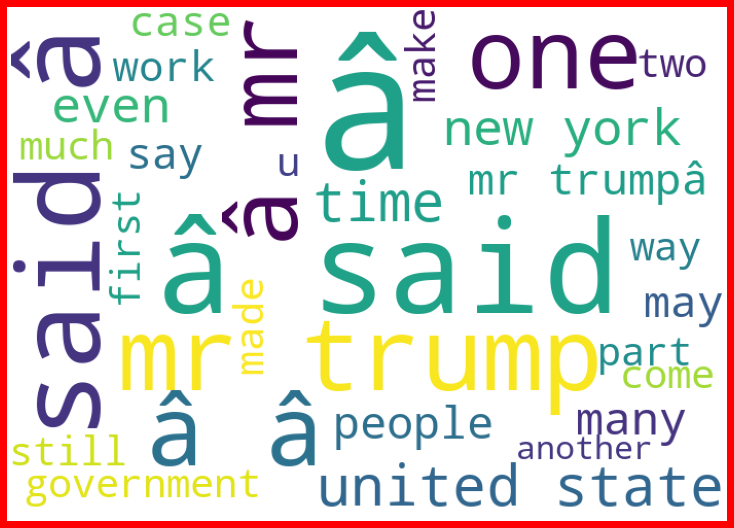

In [29]:
#creating word cloud for the real news body
from wordcloud import WordCloud

real=ds_news["news"][ds_news["label"]==0]

real_cloud=WordCloud(width=700,height=500,background_color="white",max_words=30).generate(" ".join(real))

plt.figure(figsize=(10,8),facecolor="r")

plt.imshow(real_cloud)

plt.axis("off")

plt.tight_layout(pad=0)

plt.show()

### Importing Algorithims and Metrices

In [30]:
#important algorithims and metrices
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### Splitting Target and Input Variable

In [32]:
tf_vec=TfidfVectorizer()

features=tf_vec.fit_transform(ds_news["headline"],ds_news["news"])

x=features

y=ds_news["label"]

### Assigning Aliases

In [39]:
nb=MultinomialNB()
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()

### Appending Models

In [40]:
#creating lists
models = []
models.append(('MultinomialNB',nb))
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))

### Splitting Training and Testing Data

In [34]:
#traning and predicting
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15540, 24447)
(5181, 24447)
(15540,)
(5181,)


### Machine Learning

******************* MultinomialNB *********************


MultinomialNB()


Accuracy_score= 0.8805249951746768


Cross_val_score= 0.8843688711452821


roc_auc_score= 0.8792975160417644


classification_report
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      2631
           1       0.95      0.80      0.87      2550

    accuracy                           0.88      5181
   macro avg       0.89      0.88      0.88      5181
weighted avg       0.89      0.88      0.88      5181



[[2520  111]
 [ 508 2042]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



******************* KNeighborsClassifier *********************


KNeighborsClassifier()


Accuracy_score= 0.7172360548156727


Cross_val_score= 0.7364033715336176


roc_auc_score= 0.7209186844635231


classification_report
               precision    recall  f1-score   support

           0       0.92      0.49      0.64      2631
           1       0.64      0.96      0.77      2550

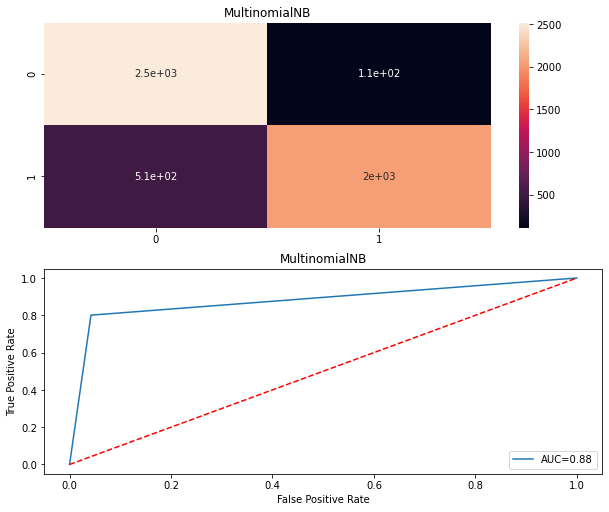

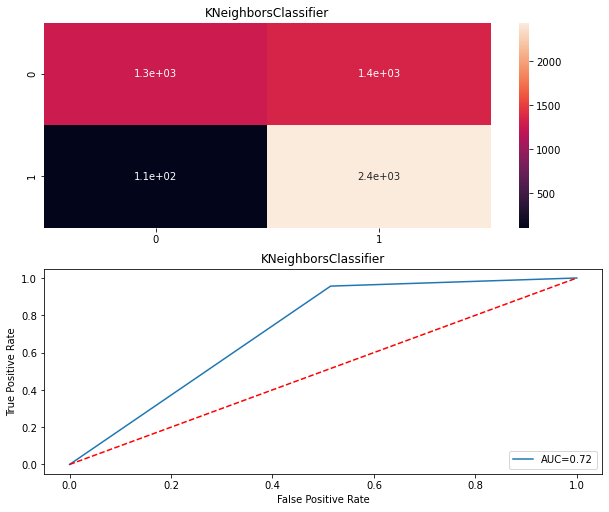

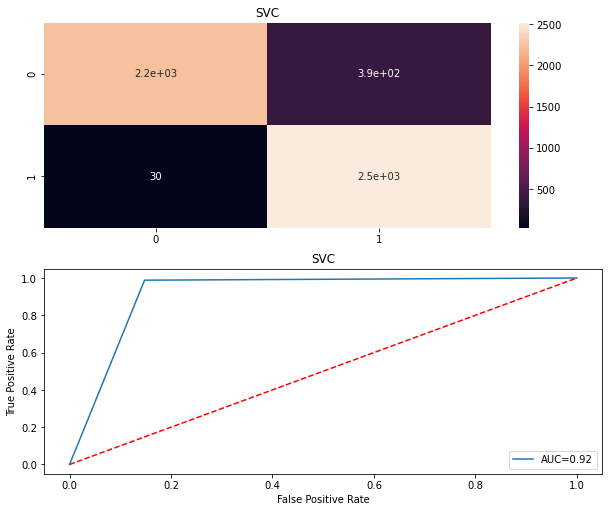

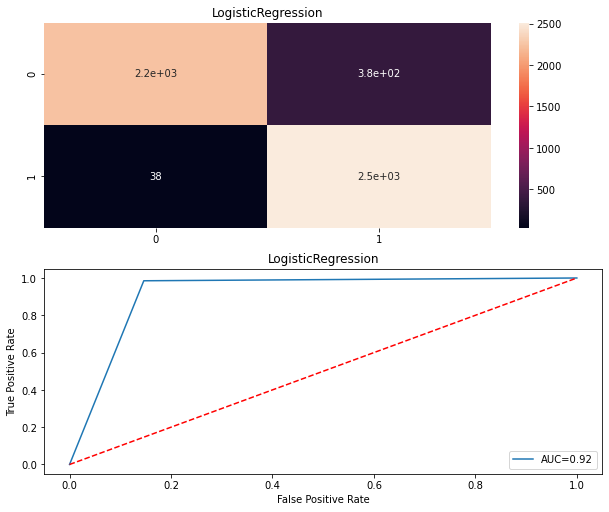

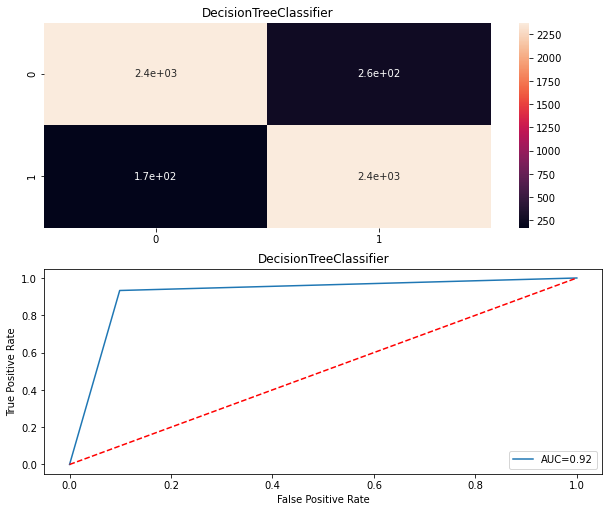

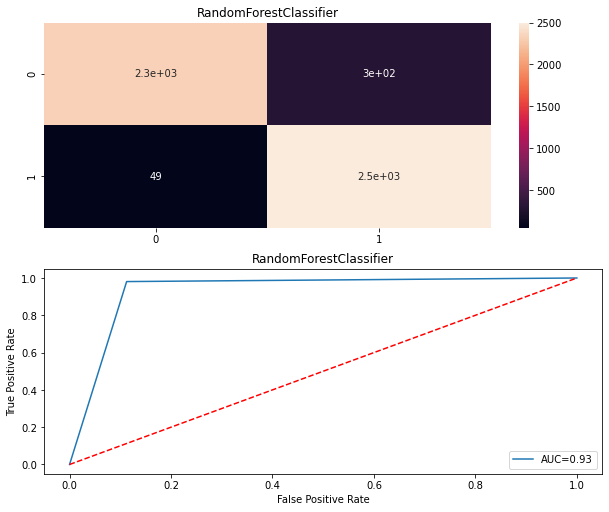

In [41]:
#using a loop function to train test the model
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("*******************",name,"*********************")
    print("\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    
    pred=model.predict(x_test)
    print("\n")
    
    AS=accuracy_score(y_test,pred)
    print("Accuracy_score=",AS)
    score.append(AS*100)
    print("\n")
    
    sc= cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("Cross_val_score=",sc)
    cvs.append(sc*100)
    print("\n")
    
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score=",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    
    print("classification_report\n",classification_report(y_test,pred))
    print("\n")
    
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label="AUC=%0.2f"% roc_auc)
    plt.plot([0,1],[0,1],"r--")
    plt.legend(loc="lower right")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    print("\n\n")

### Framing Compare Table 

In [42]:
#framing a compare tables to display the results
results=pd.DataFrame({"Model":Model,"Accuracy_Score":score,"Cross_Val_Score":cvs,"Roc_Auc_Score":rocscore})
results

,Model,Accuracy_Score,Cross_Val_Score,Roc_Auc_Score
0,MultinomialNB,88.052500,88.436887,87.929752
1,KNeighborsClassifier,71.723605,73.640337,72.091868
2,SVC,91.912758,92.838150,92.019138
3,LogisticRegression,91.835553,92.630632,91.938292
4,DecisionTreeClassifier,91.681143,92.051524,91.705972
5,RandomForestClassifier,93.341054,93.967447,93.413978


### HyperParameter Tuning

In [43]:
#hyper parameter tuning rthe best fitmorel to improve the performance
from sklearn.model_selection import GridSearchCV
parameterrfc={"n_estimators":[20,30,40,50,60,70,80,90,100],
             "criterion":["gini","entropy"],
             "max_features":["auto","sqrt","log2"],
             "max_depth":[2,3,4,5,6,None]}
gridrfc=GridSearchCV(rfc,param_grid=parameterrfc,n_jobs=-1,cv=10)
gridrfc.fit(x_train,y_train)
gridrfc.best_score_,gridrfc.best_params_

(0.9386743886743888,
 {'criterion': 'entropy',
  'max_depth': None,
  'max_features': 'sqrt',
  'n_estimators': 70})

### Using Best Parameter

In [45]:
#using the best parameters retrived from hyper parameter tuning 
rfc=RandomForestClassifier(criterion="gini",max_depth=None,max_features="auto",n_estimators=100)
rfc.fit(x_train,y_train)

pred=rfc.predict(x_test)
    
AS=accuracy_score(y_test,pred)
print("Accuracy_score=",AS)
    
cvs_score=cross_val_score(rfc,x,y,cv=10,scoring="accuracy").mean()
print("Cross_Val_Score=",cvs_score)

Accuracy_score= 0.9337965643698127
Cross_Val_Score= 0.9385163771379401


### Saving Model

In [46]:
#saving the best fit model
import joblib
joblib.dump(rfc,"Model_Fake_News_rfc.obj")

['Model_Fake_News_rfc.obj']

### Loading Model

In [47]:
#loading the best fit model
Model_Fake_News=joblib.load("Model_Fake_News_rfc.obj")

### Using Model

In [48]:
#using the best fit model
pd.DataFrame(Model_Fake_News.predict(x_test))

,0
0,1
1,1
2,1
3,1
4,1
...,...
5176,0
5177,1
5178,0
5179,1
